In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [3]:
df = pd.read_csv("./data.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.drop_duplicates(inplace=True)


In [5]:
df = df.reset_index(drop=False)
df.head()

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     302 non-null    int64  
 1   age       302 non-null    int64  
 2   sex       302 non-null    int64  
 3   cp        302 non-null    int64  
 4   trestbps  302 non-null    int64  
 5   chol      302 non-null    int64  
 6   fbs       302 non-null    int64  
 7   restecg   302 non-null    int64  
 8   thalach   302 non-null    int64  
 9   exang     302 non-null    int64  
 10  oldpeak   302 non-null    float64
 11  slope     302 non-null    int64  
 12  ca        302 non-null    int64  
 13  thal      302 non-null    int64  
 14  target    302 non-null    int64  
dtypes: float64(1), int64(14)
memory usage: 35.5 KB


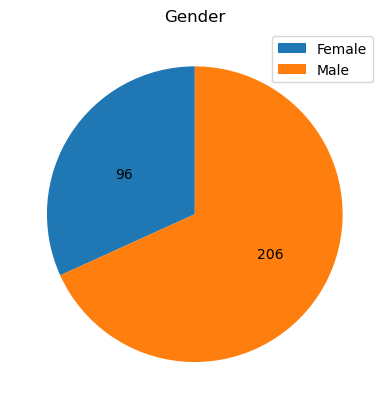

In [7]:
gender_cnt =df.groupby(by=["sex"]).count()["index"].to_numpy()
plt.pie(x=gender_cnt,startangle=90,labels=gender_cnt,labeldistance=0.5) # type: ignore
plt.legend(labels=["Female", "Male"])
plt.title("Gender")
plt.show()

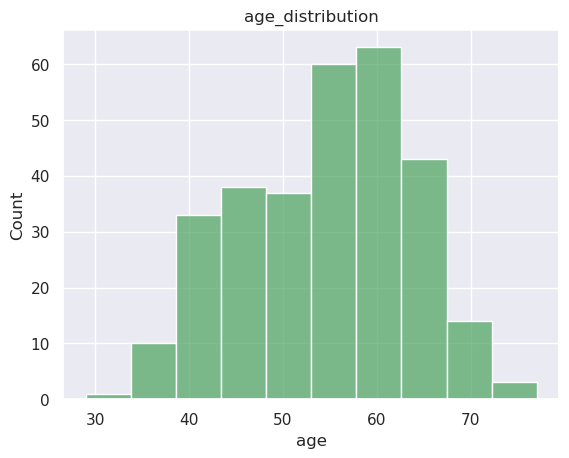

In [8]:
sns.set_theme("notebook")
sns.set_style("darkgrid")
plt.title("age_distribution")
sns.histplot(df,x="age",color="g",bins=10,kde=False,stat="count",cumulative=False)
plt.savefig(fname="./plots/age_dist.png",dpi=100)

plt.show()

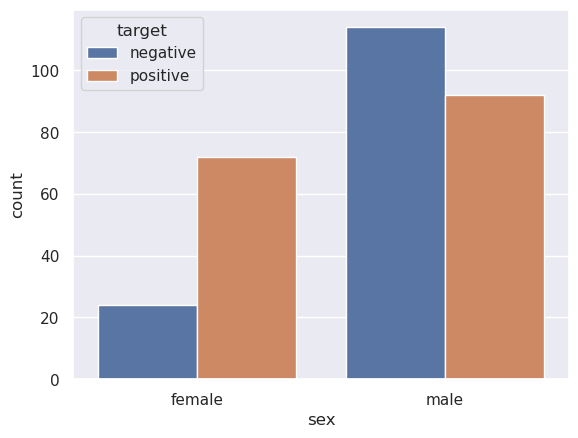

In [9]:
x = df.groupby(by=["sex", "target"]).count()["index"]


g = sns.countplot(df, x="sex", hue="target")
g.legend(labels=["negative","positive"]).set_title("target")
g.set_xticks([0, 1], ["female", "male"])
plt.show()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     302 non-null    int64  
 1   age       302 non-null    int64  
 2   sex       302 non-null    int64  
 3   cp        302 non-null    int64  
 4   trestbps  302 non-null    int64  
 5   chol      302 non-null    int64  
 6   fbs       302 non-null    int64  
 7   restecg   302 non-null    int64  
 8   thalach   302 non-null    int64  
 9   exang     302 non-null    int64  
 10  oldpeak   302 non-null    float64
 11  slope     302 non-null    int64  
 12  ca        302 non-null    int64  
 13  thal      302 non-null    int64  
 14  target    302 non-null    int64  
dtypes: float64(1), int64(14)
memory usage: 35.5 KB


In [11]:
df["age_group"] = pd.cut(df["age"],bins=[20,30,40,50,60,70,80])

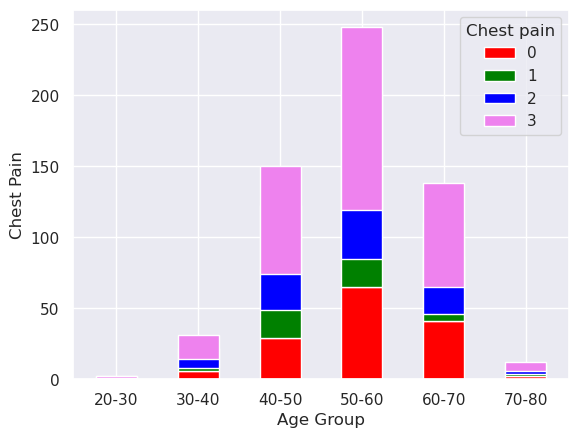

In [44]:
age_cp = df.groupby(by=["age_group", "cp"], observed=False).count()[
    "index"].to_numpy()
age_cp = age_cp.reshape(
    (len(df["age_group"].unique()), len(df["cp"].unique())))
age_cp = np.cumsum(age_cp, axis=1)

x = list(map(lambda x: f'{x.left}-{x.right}', np.sort(df["age_group"].unique())))
g = plt.bar(x=x, height=age_cp[:, 0], width=0.5, color="red")
i = plt.bar(x=x, height=age_cp[:, 1], width=0.5,
            color="green", bottom=age_cp[:, 0])
j = plt.bar(x=x, height=age_cp[:, 2], width=0.5,
            color="blue", bottom=age_cp[:, 1])
k = plt.bar(x=x, height=age_cp[:, 3], width=0.5,
            color="violet", bottom=age_cp[:, 2])
plt.xlabel("Age Group")
plt.ylabel("Chest Pain")
plt.legend(labels=["0","1","2","3"]).set_title("Chest pain")
plt.show()

/tmp/ipykernel_73450/680889787.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(["Female","Male"])


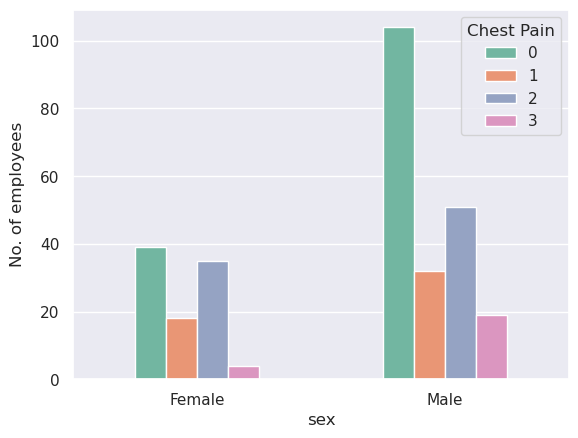

In [95]:
g = sns.barplot(data=df.groupby(by=["sex", "cp"], observed=False).count(),
            x="sex",
            y="index",
            hue="cp", dodge=True,
            width=0.5,
            palette="Set2"
            )
g.set_xticklabels(["Female","Male"])
g.legend().set_title("Chest Pain")
g.set_ylabel("No. of employees")
plt.show()

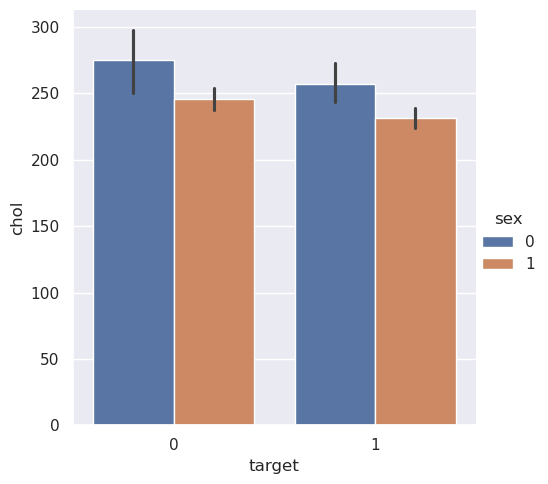

In [110]:
sns.catplot(df,x="target",y="chol",hue="sex",kind="bar",estimator="mean")
plt.show()

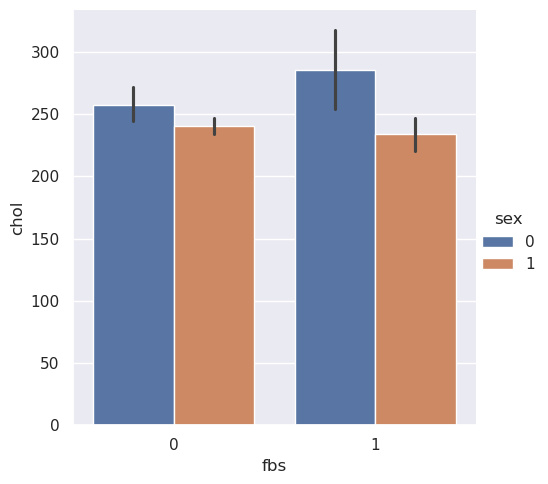

In [115]:
sns.catplot(df,x="fbs",y="chol",hue="sex",kind="bar",estimator="mean")
plt.show()

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   index      302 non-null    int64   
 1   age        302 non-null    int64   
 2   sex        302 non-null    int64   
 3   cp         302 non-null    int64   
 4   trestbps   302 non-null    int64   
 5   chol       302 non-null    int64   
 6   fbs        302 non-null    int64   
 7   restecg    302 non-null    int64   
 8   thalach    302 non-null    int64   
 9   exang      302 non-null    int64   
 10  oldpeak    302 non-null    float64 
 11  slope      302 non-null    int64   
 12  ca         302 non-null    int64   
 13  thal       302 non-null    int64   
 14  target     302 non-null    int64   
 15  age_group  302 non-null    category
dtypes: category(1), float64(1), int64(14)
memory usage: 36.1 KB


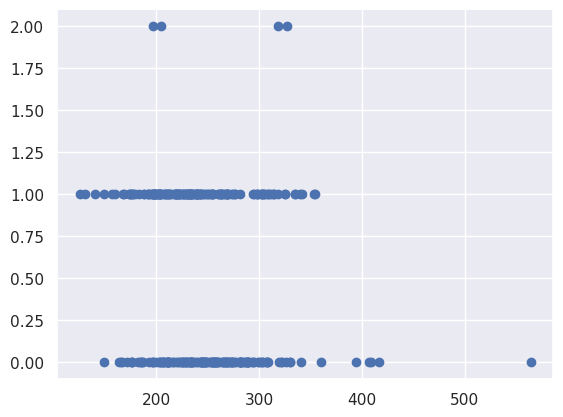

In [120]:
plt.scatter(df["chol"], df["restecg"])
plt.show()

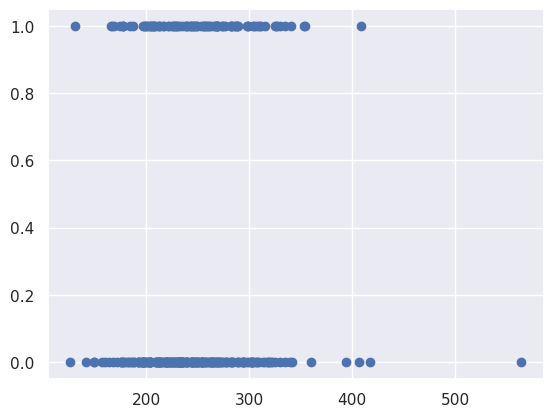

In [121]:
plt.scatter(df["chol"], df["exang"])
plt.show()

In [123]:
df["ca"]

0      2
1      0
2      0
3      1
4      3
      ..
297    0
298    0
299    1
300    0
301    1
Name: ca, Length: 302, dtype: int64